In [1]:
import torch
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

paths = [
    "25/log_width25-noise0.txt", "25/log_width25-noise2.txt", "25/log_width25-noise4.txt", "25/log_width25-noise6.txt",
    "50/log_width50-noise0.txt", "50/log_width50-noise2.txt", "50/log_width50-noise4.txt", "50/log_width50-noise6.txt",
    "100/log_width100-noise0.txt", "100/log_width100-noise2.txt", "100/log_width100-noise4.txt", "100/log_width100-noise6.txt",
    "200/log_width200-noise0.txt", "200/log_width200-noise2.txt", "200/log_width200-noise4.txt", "200/log_width200-noise6.txt",
    "400/log_width400-noise0.txt", "400/log_width400-noise2.txt", "400/log_width400-noise4.txt", "400/log_width400-noise6.txt",
    "800/log_width800-noise0.txt", "800/log_width800-noise2.txt", "800/log_width800-noise4.txt", "800/log_width800-noise6.txt",
    "1000/log_width1000-noise0.txt", "1000/log_width1000-noise2.txt", "1000/log_width1000-noise4.txt", "1000/log_width1000-noise6.txt",
    "1600/log_width1600-noise0.txt", "1600/log_width1600-noise2.txt", "1600/log_width1600-noise4.txt", "1600/log_width1600-noise6.txt",
    "2000/log_width2000-noise0.txt", "2000/log_width2000-noise2.txt", "2000/log_width2000-noise4.txt", "2000/log_width2000-noise6.txt"
]

i_to_word = {
    0: 'trial', 1: 'train_loss', 2: 'train_acc', 3: 'test_loss', 4: 'test_acc', 5: 'bias2', 6: 'variance'
}

def get_metrics(paths):
    overall_metrics = []
    for p in paths:
        # Go through all trials for each
        with open(p,'rb') as f:
            lines = f.readlines()
            cur_metrics = []
            for ind, line in enumerate(lines):
                cur_line = line.decode("utf-8")
                cur_word = cur_line.split()
                if ind != 0:
                    cur_arr = np.zeros(len(cur_word))
                    for i, s in enumerate(cur_word):
                        cur_arr[i] = np.float(s)
                    cur_metrics.append(cur_arr)
            overall_metrics.append(cur_metrics)
    return overall_metrics

overall_metrics = get_metrics(paths)

In [27]:
def plot_trial(overall_metrics, i_to_word, attribute_id=2, trial_id=0, jump_ind=4):
    num_plots = jump_ind
    fig = plt.figure(figsize = (8,8))
    ax = plt.axes()
    noise = [0.0, 0.2, 0.4, 0.6]

    for i in range(num_plots):
        cur_y = []
        cur_i = i
        while cur_i < len(paths):
            cur_y.append(overall_metrics[cur_i][trial_id][attribute_id])
            cur_i += jump_ind
        print(cur_y)
        label = str(noise[i]) + ' noise level'
        x = [25, 50, 100, 200, 400, 800, 1000, 1600, 2000]
        x = [np.log(y) for y in x]
        ax.plot(x, cur_y, label=label)
    plt.xlabel('Model Complexity (nn dense params)')
    plt.ylabel(i_to_word[attribute_id])
    plt.legend()
    plt.show()

In [28]:
i_to_word

{0: 'trial',
 1: 'train_loss',
 2: 'train_acc',
 3: 'test_loss',
 4: 'test_acc',
 5: 'bias2',
 6: 'variance'}

[3.2188758248682006, 3.912023005428146, 4.605170185988092, 5.298317366548036, 5.991464547107982, 6.684611727667927, 6.907755278982137, 7.3777589082278725, 7.600902459542082]
[1.62452354985214, 1.4312677267626213, 1.3676210958542698, 1.3397267253035554, 1.2919836816486494, 1.2963696535919051, 1.3001916620664793, 1.3045418592476334, 1.2897834607390481]
[3.2188758248682006, 3.912023005428146, 4.605170185988092, 5.298317366548036, 5.991464547107982, 6.684611727667927, 6.907755278982137, 7.3777589082278725, 7.600902459542082]
[1.7505901921899834, 1.6098378324554263, 1.4964931534179648, 1.4969408812069551, 1.4464482839396389, 1.4469189829363254, 1.4440914598461072, 1.414881817971803, 1.4678743481123142]
[3.2188758248682006, 3.912023005428146, 4.605170185988092, 5.298317366548036, 5.991464547107982, 6.684611727667927, 6.907755278982137, 7.3777589082278725, 7.600902459542082]
[2.032611954323038, 1.8988185415214625, 1.8456161420187647, 1.810908288066816, 1.8073046805635162, 1.8325814637483102, 

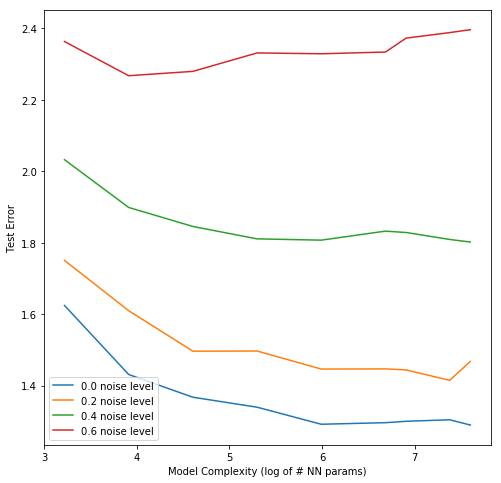

In [29]:
# Trial_id corresponds to running the model params 5 times
# Attribute id corresponds to our "i_to_word" dict
plot_trial(overall_metrics, i_to_word, attribute_id=4, trial_id=4)

[0.073782, 0.066472, 0.063834, 0.062931, 0.061951, 0.061557, 0.061628, 0.061326, 0.061286]
[2.0197, 2.0161, 2.0096, 2.0009, 2.0021, 1.9959, 1.994283, 1.9916, 1.9909]
[4.8897, 4.8724, 4.8631, 4.8518, 4.844, 4.8306, 4.826996, 4.8124, 4.8083]
[7.7805, 7.7966, 7.8061, 7.7929, 7.7652, 7.7527, 7.752203, 7.7417, 7.7418]


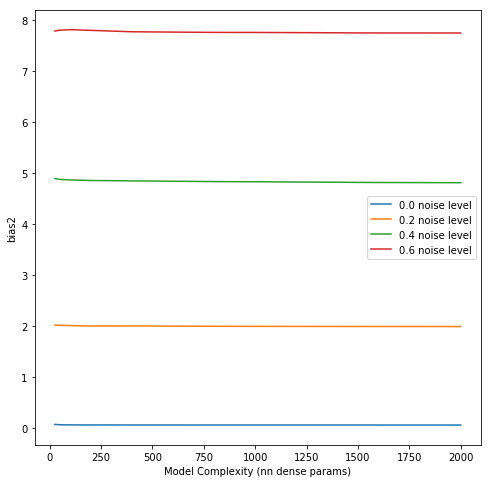

In [5]:
plot_trial(overall_metrics, i_to_word, attribute_id=5, trial_id=4)

[98.017, 98.742, 98.9, 98.933, 99.083, 99.042, 99.017, 98.992, 99.192]
[80.683, 81.392, 81.817, 81.717, 82.075, 82.217, 82.225, 82.0, 82.233]
[62.983, 63.558, 64.4, 65.233, 65.683, 66.017, 66.483, 66.475, 66.9]
[45.267, 46.475, 47.467, 49.2, 50.133, 51.167, 51.242, 52.833, 52.342]


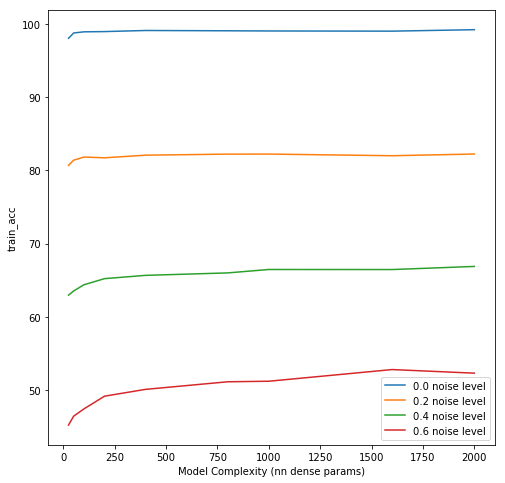

In [6]:
plot_trial(overall_metrics, i_to_word, attribute_id=2, trial_id=0)

[0.081949, 0.073199, 0.070787, 0.068956, 0.068091, 0.065426, 0.065537, 0.068425, 0.067751]
[0.13567, 0.12934, 0.12416, 0.12397, 0.13008, 0.12311, 0.126472, 0.13065, 0.13145]
[0.25629, 0.25589, 0.24974, 0.24756, 0.25121, 0.24781, 0.248396, 0.25331, 0.25678]
[0.43265, 0.4202, 0.41342, 0.41441, 0.41945, 0.41776, 0.420859, 0.42337, 0.41969]


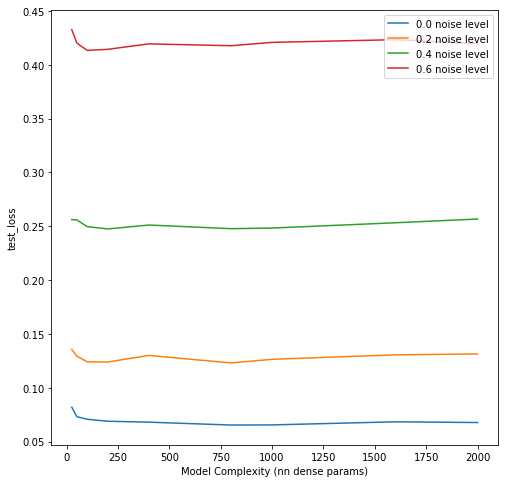

In [7]:
plot_trial(overall_metrics, i_to_word, attribute_id=3, trial_id=0)

[0.073782, 0.066472, 0.063834, 0.062931, 0.061951, 0.061557, 0.061628, 0.061326, 0.061286]
[2.0197, 2.0161, 2.0096, 2.0009, 2.0021, 1.9959, 1.994283, 1.9916, 1.9909]
[4.8897, 4.8724, 4.8631, 4.8518, 4.844, 4.8306, 4.826996, 4.8124, 4.8083]
[7.7805, 7.7966, 7.8061, 7.7929, 7.7652, 7.7527, 7.752203, 7.7417, 7.7418]


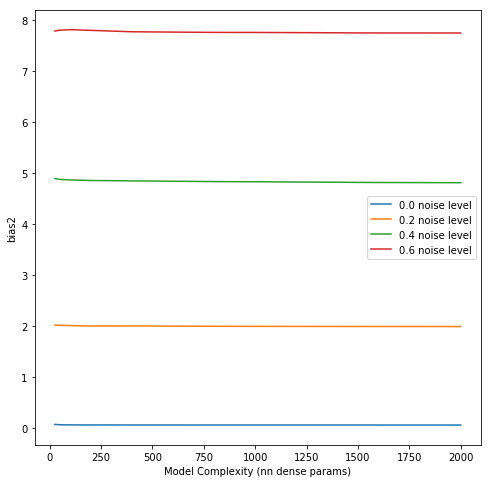

[0.010711, 0.0066297, 0.0056048, 0.0052914, 0.0048381, 0.0044784, 0.0046283, 0.0044627, 0.0048288]
[-1.8842, -1.8863, -1.8829, -1.8742, -1.8764, -1.8701, -1.8680015, -1.8656, -1.8637]
[-4.6312, -4.6178, -4.6121, -4.6031, -4.5945, -4.58, -4.5760975, -4.5606, -4.5558]
[-7.3459, -7.3756, -7.3898, -7.3758, -7.3461, -7.3347, -7.3333564, -7.325, -7.3265]


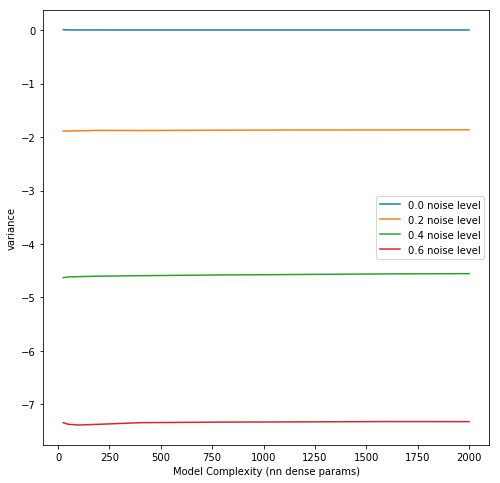

In [8]:
# Should look at bias and variance at the last trial (averaged across all trials)
plot_trial(overall_metrics, i_to_word, attribute_id=5, trial_id=4)
plot_trial(overall_metrics, i_to_word, attribute_id=6, trial_id=4)

[0.081949, 0.073199, 0.070787, 0.068956, 0.068091, 0.065426, 0.065537, 0.068425, 0.067751]
[0.13567, 0.12934, 0.12416, 0.12397, 0.13008, 0.12311, 0.126472, 0.13065, 0.13145]
[0.25629, 0.25589, 0.24974, 0.24756, 0.25121, 0.24781, 0.248396, 0.25331, 0.25678]
[0.43265, 0.4202, 0.41342, 0.41441, 0.41945, 0.41776, 0.420859, 0.42337, 0.41969]


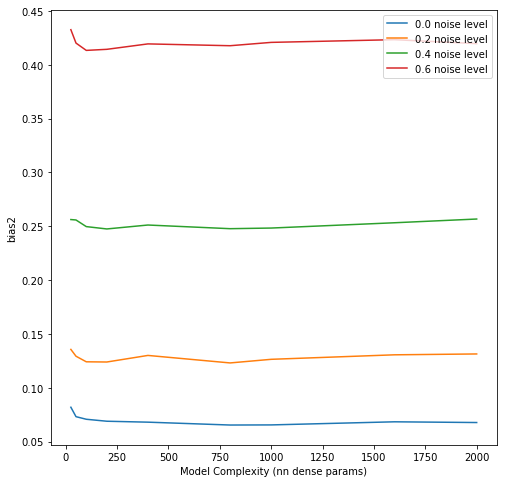

[-0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]


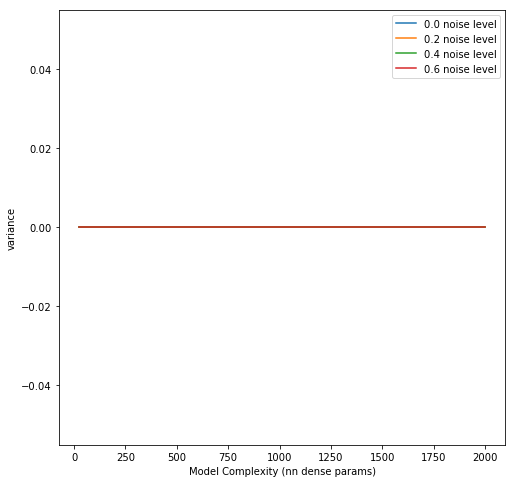

In [9]:
# Probably just a noisy output since only 1 trial to compare & compute bias/variance
plot_trial(overall_metrics, i_to_word, attribute_id=5, trial_id=0)
plot_trial(overall_metrics, i_to_word, attribute_id=6, trial_id=0)